In [1]:
import numpy as np
from PySDM.physics.constants import si
from PySDM_examples.Luettmer_homogeneous_freezing.commons import run_simulations, hom_pure_droplet_freezing_backend, hom_pure_droplet_freezing_standard_setup
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot

In [2]:
""" General settings """
hom_freezing_types     = [  "KoopMurray2016", "Spichtinger2023" ]
hom_freezing_types_all = [  "KoopMurray2016", "Spichtinger2023", "Koop2000"  ]
vertical_updrafts = np.geomspace(0.2,10,num=9) * si.meter / si.second

backends = hom_pure_droplet_freezing_backend()
standard = hom_pure_droplet_freezing_standard_setup()

In [3]:
setting_dict = {
            **standard,
            "backend": backends["KoopMurray2016"],
            "hom_freezing": "KoopMurray2016",
            "w_updraft": 10.,
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_dep_KoopMurray2016_simulation = run_simulations(setting_dict)
setting_dict = {
            **standard,
            "backend": backends["Spichtinger2023"],
            "hom_freezing": "Spichtinger2023",
            "w_updraft": 10.,
            "deposition_enable": True,
            "n_output": 1,
             "n_sd": int(1e4),
            }
reference_high_dep_Spichtinger2023_simulation = run_simulations(setting_dict)

Setting up simulation for KoopMurray2016 with wpdraft=10.0 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for Spichtinger2023 with wpdraft=10.0 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated


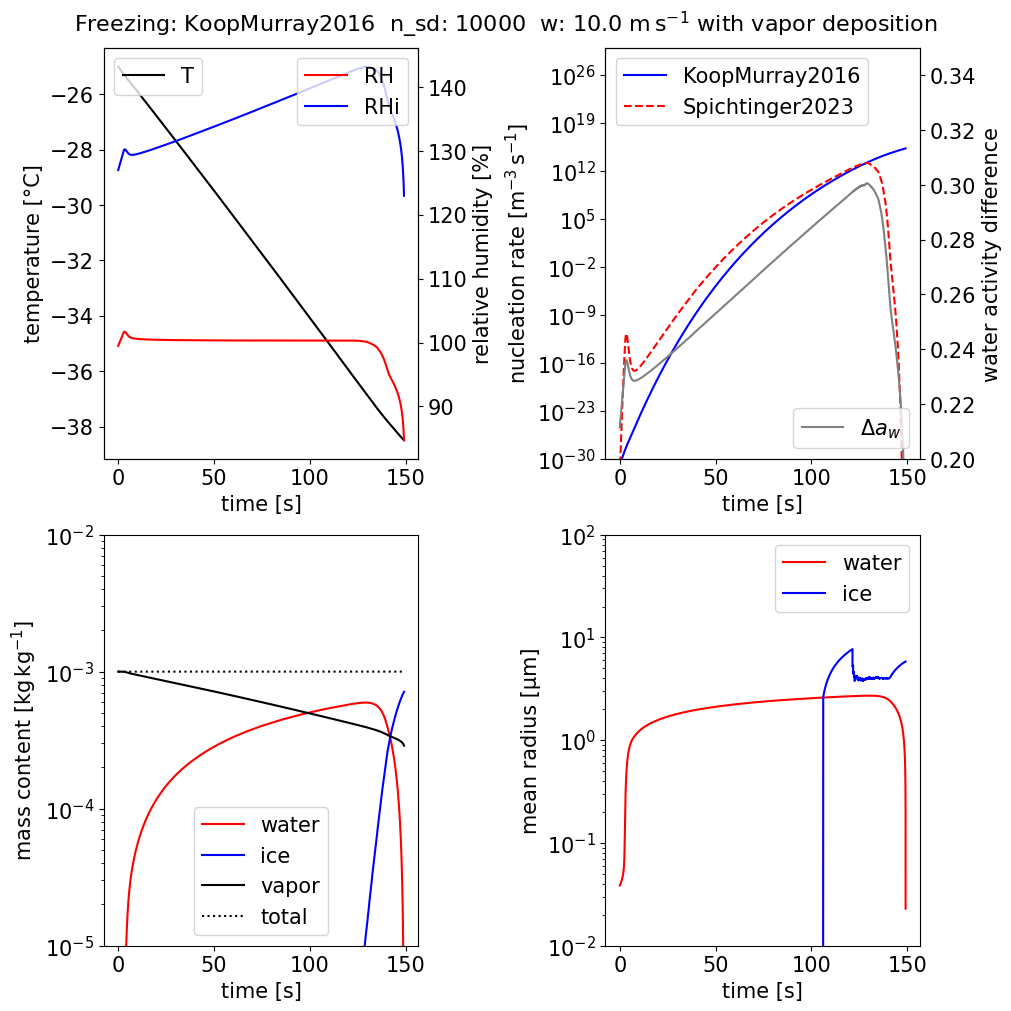

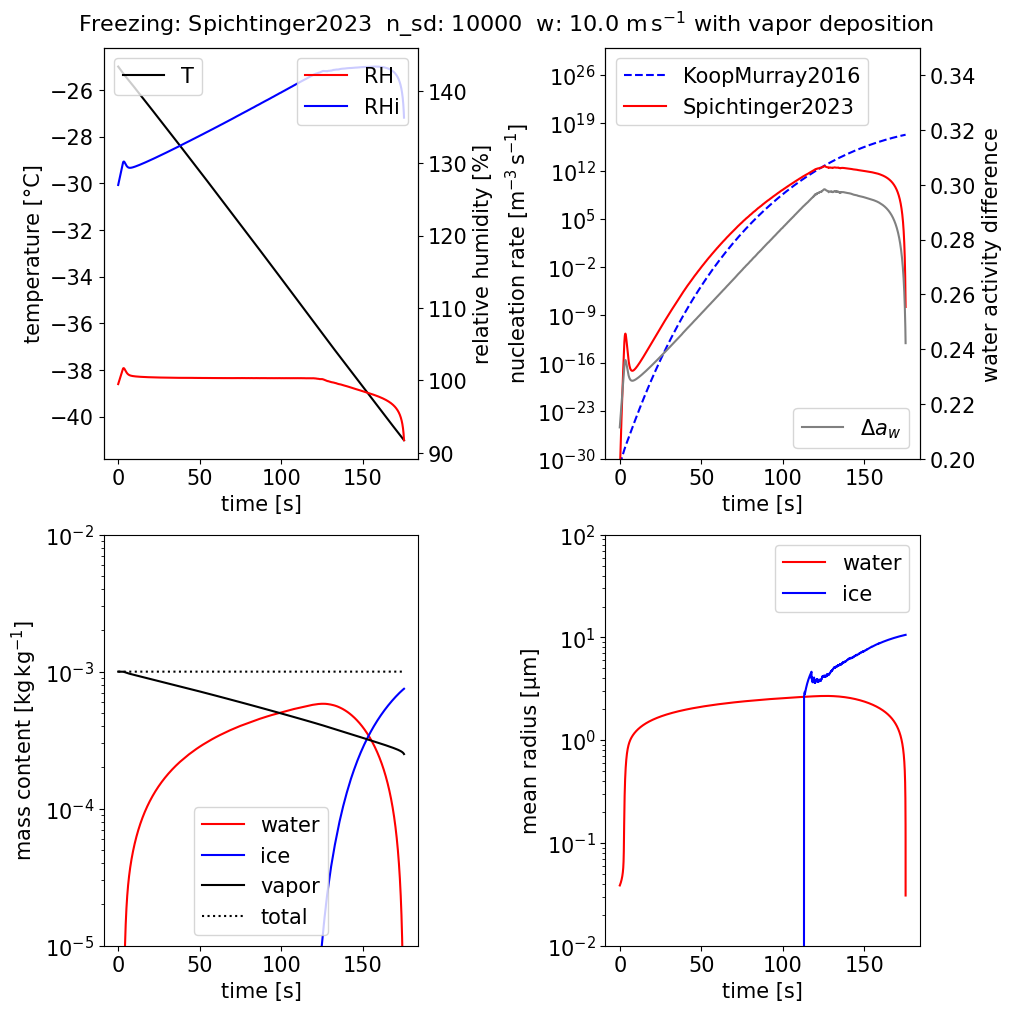

In [4]:
plot.plot_thermodynamics_and_bulk(reference_high_dep_KoopMurray2016_simulation, " with vapor deposition")
plot.plot_thermodynamics_and_bulk(reference_high_dep_Spichtinger2023_simulation, " with vapor deposition")

In [5]:
""" Simulations for n_sd ensemble with deposition """
nsd_ensemble_deposition_simulations =[]
number_of_nsd = (1e2, 1e3, 1e4)
for hom_freezing_type in hom_freezing_types:
    for n_sd in number_of_nsd:
        setting_dict = {
            **standard,
            "n_sd": int(n_sd),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 5,
            "deposition_enable": True,
            }
        nsd_ensemble_deposition_simulations.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=100 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=1000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n

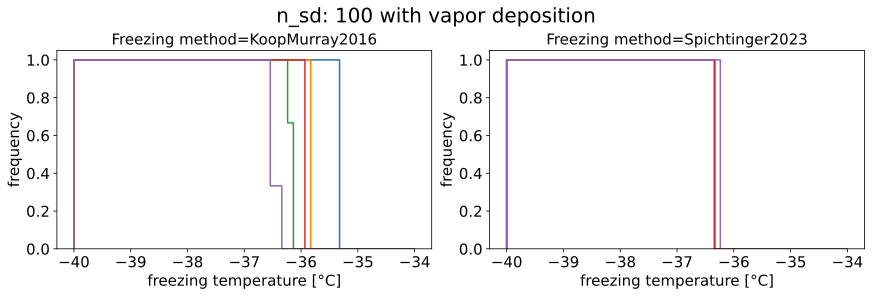

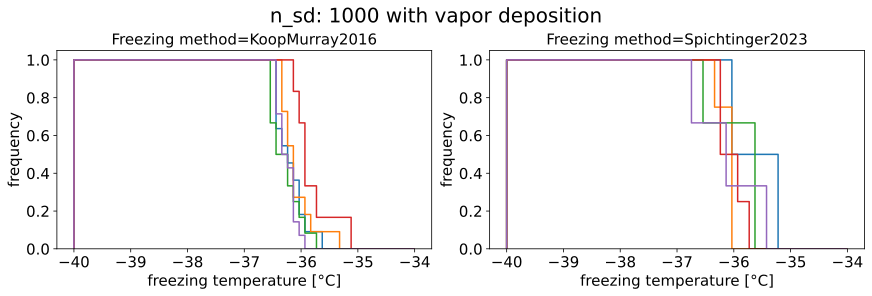

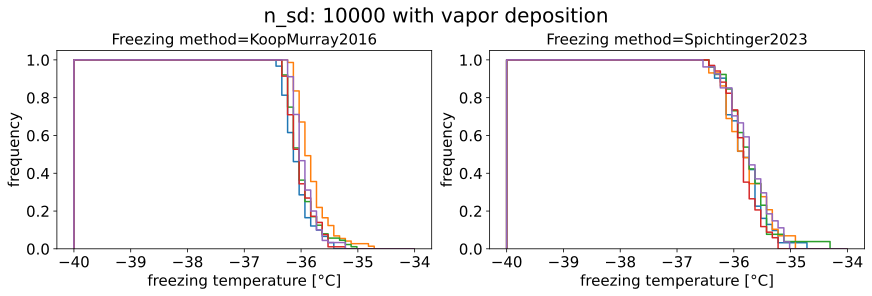

In [6]:
for n_sd in number_of_nsd:
    fig, axs = pyplot.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
    fig.suptitle("n_sd: {} with vapor deposition".format(int(n_sd)), fontsize=20)
    axs = axs.ravel()
    i = 0
    for simulation in nsd_ensemble_deposition_simulations:
        if simulation["settings"]["n_sd"] == n_sd and simulation["settings"]["w_updraft"] == standard["w_updraft"]:
            axs[i] = plot.plot_freezing_temperatures_histogram(axs[i], simulation)
            i += 1
    show_plot()

In [7]:
""" Simulations for updraft histogram with deposition """
simulations_updraft_ensemble = []

for hom_freezing_type in hom_freezing_types:
    for updraft in vertical_updrafts:
        setting_dict = {
            **standard,
            "w_updraft": updraft  * si.meter / si.second,
            "n_sd": int(1e4),
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
            "number_of_ensemble_runs": 1,
            }

        simulations_updraft_ensemble.append( run_simulations(setting_dict) )

Setting up simulation for KoopMurray2016 with wpdraft=0.2 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.32613788179066194 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.5318295896944989 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=0.8672488792828036 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.4142135623730951 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=2.306143078159937 and n_sd=10000 and n_dv=4999999999.999999
Starting simulation...
all particle

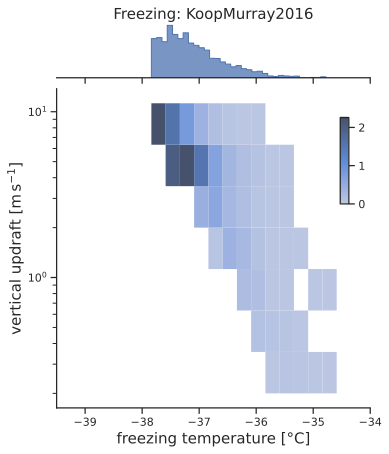

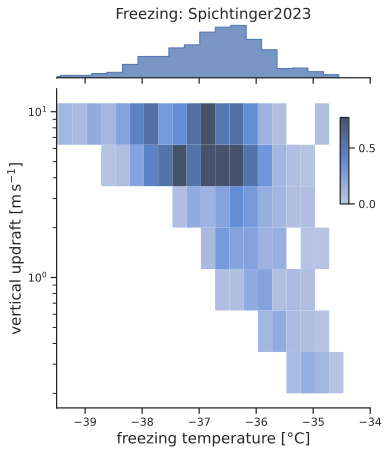

In [13]:
for hom_freezing_type in hom_freezing_types:

    histogram_data_dict = {}

    histogram_data_dict["hom_freezing_type"] = hom_freezing_type
    histogram_data_dict["T_frz_histogram_list"] = []
    histogram_data_dict["w_updraft_histogram_list"] = []

    for i, updraft in enumerate(vertical_updrafts):
        for simulation in simulations_updraft_ensemble:
            if (simulation["settings"]["w_updraft"] == updraft
                    and simulation["settings"]["hom_freezing"] == hom_freezing_type):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = output["T_frz"]
                histogram_data_dict["T_frz_histogram_list"].extend( T_frz )
                histogram_data_dict["w_updraft_histogram_list"].extend( np.full_like(T_frz, updraft) )

    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_dict)
    show_plot()

In [9]:
""" Simulations for CCN concentration histogram  """
simulations_ccn_concentration_ensemble = []
number_concentrations = np.geomspace(100, 20000, num=10) / si.cm ** 3

for hom_freezing_type in hom_freezing_types:
    for n_dv in number_concentrations:
        setting_dict = {
            **standard,
            "n_sd": int(1e4),
            "N_dv_droplet_distribution": n_dv,
            "backend": backends[hom_freezing_type],
            "hom_freezing": hom_freezing_type,
        }
        simulations_ccn_concentration_ensemble.append(run_simulations(setting_dict))

Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=99999999.99999999
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=180164823.06544116
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=324593634.7020169
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=584803547.6425728
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=1053610276.8906642
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpdraft=1.0 and n_sd=10000 and n_dv=1898235091.1593704
Starting simulation...
all particles frozen or evaporated
Setting up simulation for KoopMurray2016 with wpd

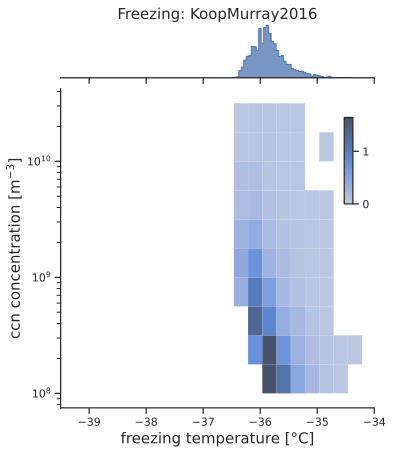

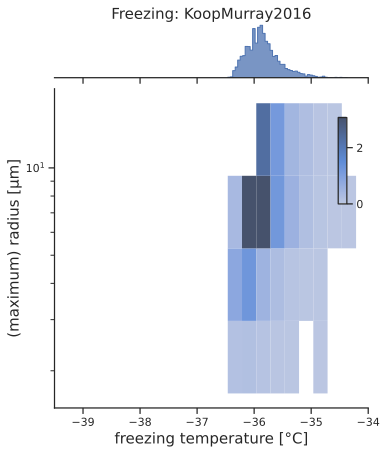

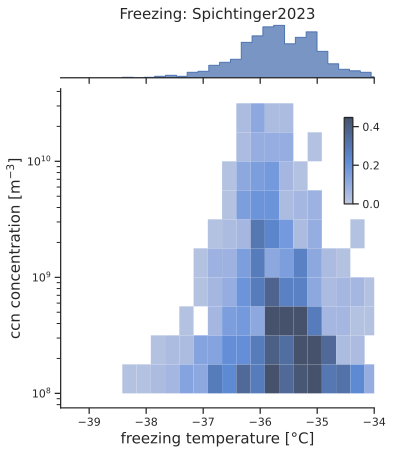

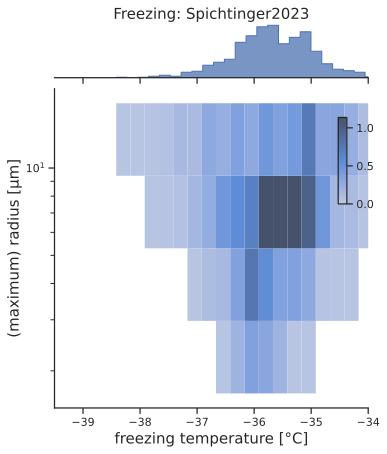

In [12]:
for hom_freezing_type in hom_freezing_types:

    histogram_data_ccn_concentration_ensemble = {}
    histogram_data_ccn_concentration_ensemble["hom_freezing_type"] = hom_freezing_type

    histogram_data_ccn_concentration_ensemble["T_frz_histogram_list"] = []
    histogram_data_ccn_concentration_ensemble["n_ccn_histogram_list"] = []
    histogram_data_ccn_concentration_ensemble["rc_max_histogram_list"] = []

    for n_ccn in number_concentrations:
        for simulation in simulations_ccn_concentration_ensemble:
            if (simulation["settings"]["hom_freezing"] == hom_freezing_type
                    and simulation["settings"]["N_dv_droplet_distribution"] == n_ccn):
                output = simulation["ensemble_member_outputs"][0]
                T_frz = np.asarray(output["T_frz"])
                rc = np.asarray(output["rs"])
                histogram_data_ccn_concentration_ensemble["T_frz_histogram_list"].extend( T_frz )
                histogram_data_ccn_concentration_ensemble["n_ccn_histogram_list"].extend( np.full_like(T_frz, n_ccn) )
                histogram_data_ccn_concentration_ensemble["rc_max_histogram_list"].extend( np.full_like(T_frz, np.amax(rc)) )

    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_ccn_concentration_ensemble)
    del histogram_data_ccn_concentration_ensemble["n_ccn_histogram_list"]
    plot.plot_freezing_temperatures_2d_histogram_seaborn(histogram_data_ccn_concentration_ensemble)
    show_plot()